In [14]:
# Colab 런타임 기본 설정
import os
import zipfile
import warnings
warnings.filterwarnings("ignore")

# 수치 연산 및 데이터 처리 라이브러리 로딩
import numpy as np
import pandas as pd

# 시각화 라이브러리 로딩
import matplotlib.pyplot as plt
import seaborn as sns

# 표 출력 유틸 로딩
from IPython.display import display

# 시각화 테마 설정
sns.set_theme(style="whitegrid")

# 데이터 업로드 진행
from google.colab import files
uploaded = files.upload()

# 업로드 파일명 목록 확인
uploaded_names = list(uploaded.keys())
print("Uploaded file list")
print(uploaded_names)

# 압축 파일명 탐색
zip_name = None
for name in uploaded_names:
    if name.lower().endswith(".zip"):
        zip_name = name
        break

print("Selected zip file")
print(zip_name)

# 압축 해제 경로 생성
extract_dir = "/content/dataset"
os.makedirs(extract_dir, exist_ok=True)

# 압축 해제 진행
with zipfile.ZipFile(zip_name, "r") as zf:
    zf.extractall(extract_dir)

print("Extract directory")
print(extract_dir)

# 데이터 파일 경로 설정
train_path = os.path.join(extract_dir, "train.csv")
test_path = os.path.join(extract_dir, "test.csv")
submission_path = os.path.join(extract_dir, "sample_submission.csv")

print("Resolved file paths")
print(train_path)
print(test_path)
print(submission_path)

Saving playground-series-s6e1.zip to playground-series-s6e1 (1).zip
Uploaded file list
['playground-series-s6e1 (1).zip']
Selected zip file
playground-series-s6e1 (1).zip
Extract directory
/content/dataset
Resolved file paths
/content/dataset/train.csv
/content/dataset/test.csv
/content/dataset/sample_submission.csv


In [22]:
# 데이터 단일 로딩
train_raw = pd.read_csv(train_path)
test_raw = pd.read_csv(test_path)
submission_raw = pd.read_csv(submission_path)

# 데이터 크기 확인
print("Data shape")
print(f"Train: {train_raw.shape}")
print(f"Test: {test_raw.shape}")
print(f"Submission: {submission_raw.shape}")

Data shape
Train: (630000, 13)
Test: (270000, 12)
Submission: (270000, 2)


In [24]:
# 학습 데이터 결측값 집계
train_null_counts = train_raw.isnull().sum()

# 학습 데이터 결측값 출력
print("Missing values in train")
if train_null_counts.sum() == 0:
    print("No missing values found.")
else:
    display(train_null_counts[train_null_counts > 0])

# 테스트 데이터 결측값 집계
test_null_counts = test_raw.isnull().sum()

# 테스트 데이터 결측값 출력
print("Missing values in test")
if test_null_counts.sum() == 0:
    print("No missing values found.")
else:
    display(test_null_counts[test_null_counts > 0])

Missing values in train
No missing values found.
Missing values in test
No missing values found.


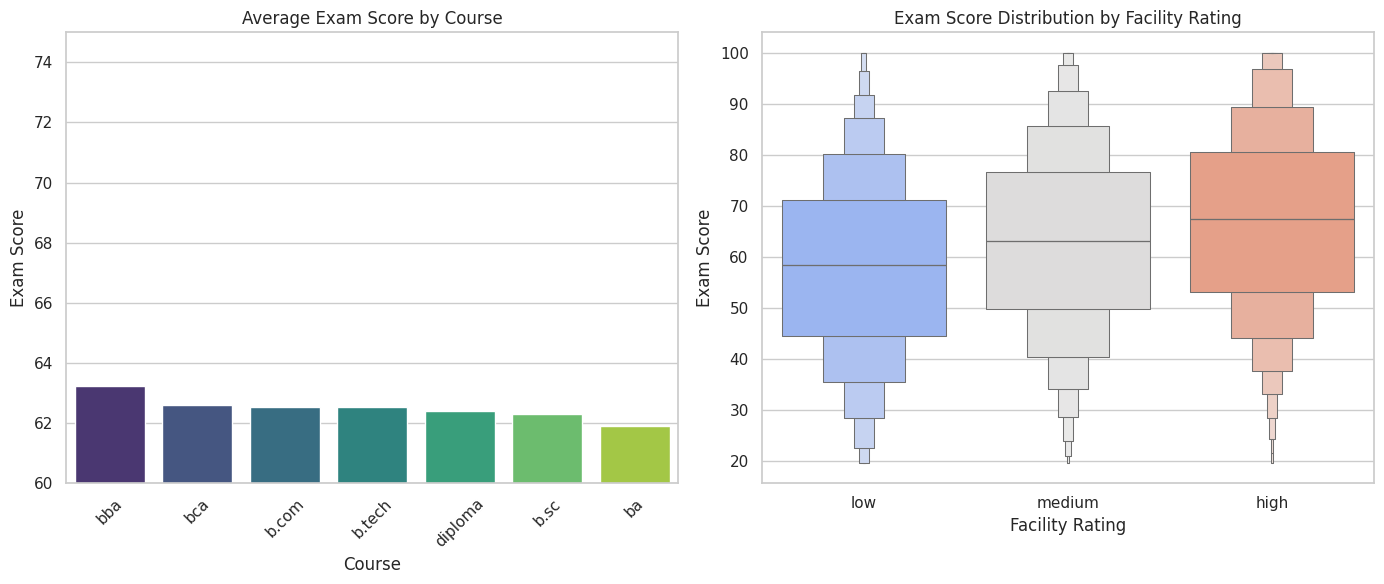

In [42]:
# 시각화용 데이터 준비
train = train_raw.copy()

# 과목별 평균 점수 및 시설 등급별 점수 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 과목별 평균 점수 정렬 기준 생성
course_order = train.groupby("course")["exam_score"].mean().sort_values(ascending=False).index

# 과목별 평균 점수 막대 그래프 시각화
sns.barplot(
    data=train,
    x="course",
    y="exam_score",
    order=course_order,
    ax=axes[0],
    palette="viridis",
    errorbar=None
)
axes[0].set_title("Average Exam Score by Course")
axes[0].set_xlabel("Course")
axes[0].set_ylabel("Exam Score")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(60, 75)

# 시설 등급별 점수 분포 박슨 플롯 시각화
sns.boxenplot(
    data=train,
    x="facility_rating",
    y="exam_score",
    ax=axes[1],
    palette="coolwarm"
)
axes[1].set_title("Exam Score Distribution by Facility Rating")
axes[1].set_xlabel("Facility Rating")
axes[1].set_ylabel("Exam Score")

# 레이아웃 정리
plt.tight_layout()
plt.show()

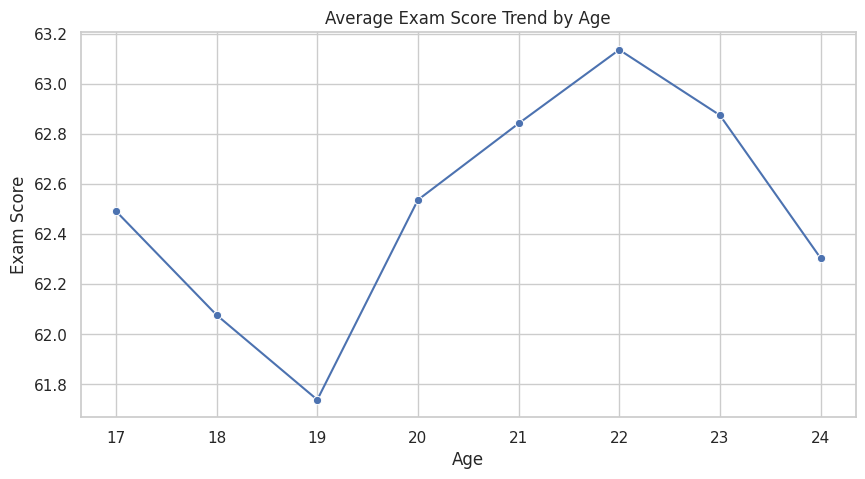

In [44]:
# 시각화용 데이터 준비
train = train_raw.copy()

# 나이별 평균 점수 추이 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=train,
    x="age",
    y="exam_score",
    marker="o",
    errorbar=None
)
plt.title("Average Exam Score Trend by Age")
plt.xlabel("Age")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

Train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


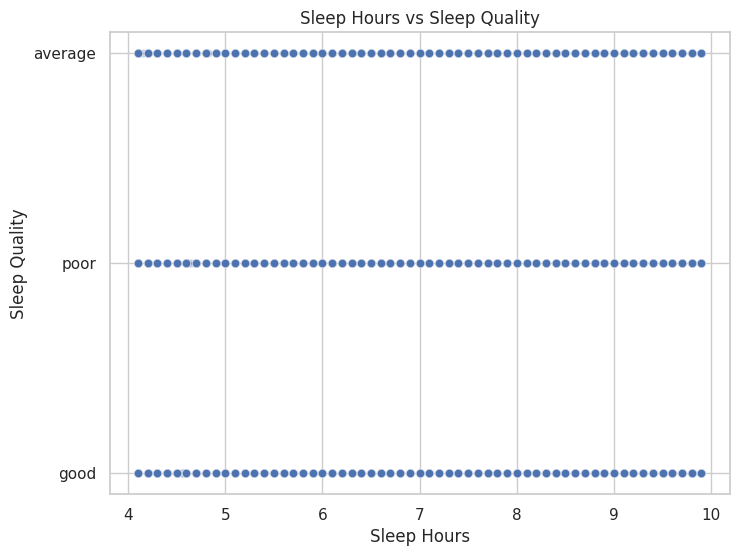

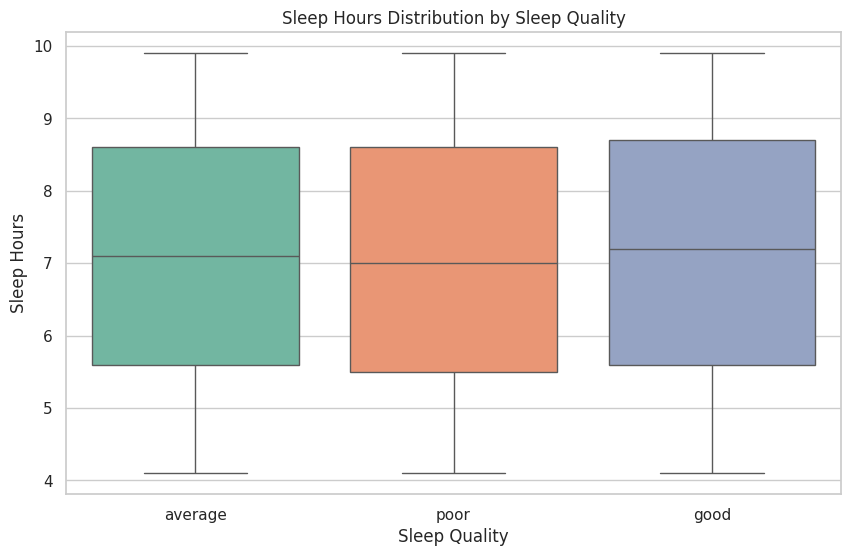

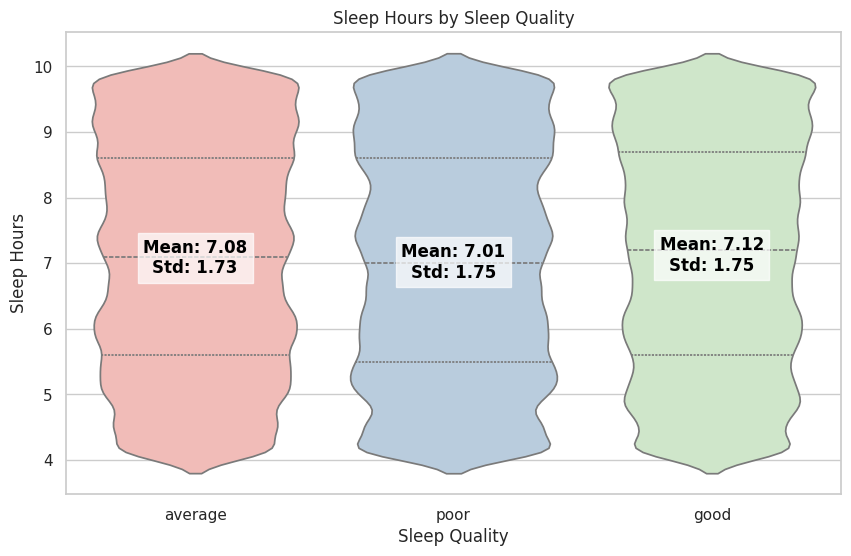

In [46]:
# 분석용 데이터 준비
df = train_raw.copy()

# 데이터 구조 확인
print("Train info")
df.info()

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="sleep_hours", y="sleep_quality", alpha=0.3)
plt.title("Sleep Hours vs Sleep Quality")
plt.xlabel("Sleep Hours")
plt.ylabel("Sleep Quality")
plt.show()

# 수면의 질 순서 목록 생성
order_list = df["sleep_quality"].unique()

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="sleep_quality", y="sleep_hours", order=order_list, palette="Set2")
plt.title("Sleep Hours Distribution by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Sleep Hours")
plt.show()

# 바이올린 플롯 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x="sleep_quality",
    y="sleep_hours",
    order=order_list,
    palette="Pastel1",
    inner="quartile"
)

# 그룹별 평균과 표준편차 추출
means = df.groupby("sleep_quality")["sleep_hours"].mean()[order_list]
stds = df.groupby("sleep_quality")["sleep_hours"].std()[order_list]

# 평균과 표준편차 텍스트 표시
for i, (m, s) in enumerate(zip(means, stds)):
    plt.text(
        i,
        m,
        f"Mean: {m:.2f}\nStd: {s:.2f}",
        ha="center",
        va="center",
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="white", alpha=0.7)
    )

plt.title("Sleep Hours by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Sleep Hours")
plt.show()

In [45]:
# 수면의 질 수치 매핑 생성
mapping = {k: v for v, k in enumerate(order_list)}
temp_df = df.copy()
temp_df["sleep_quality_num_tmp"] = temp_df["sleep_quality"].map(mapping)

# 수치 매핑 기반 상관계수 계산
corr_num = temp_df[["sleep_hours", "sleep_quality_num_tmp"]].corr().iloc[0, 1]
print(f"Mapped correlation: {corr_num:.4f}")

# 결론 출력
print("\n" + "=" * 60)
print("Key insight")
print("=" * 60)

if abs(corr_num) < 0.1:
    print("Sleep hours and sleep quality show very weak association.")
    print("Sleep quality likely depends on factors beyond duration.")
else:
    print("Sleep hours and sleep quality show a weak association.")
    print("Longer sleep may be linked to slightly better reported quality.")

Mapped correlation: 0.0095

Key insight
Sleep hours and sleep quality show very weak association.
Sleep quality likely depends on factors beyond duration.


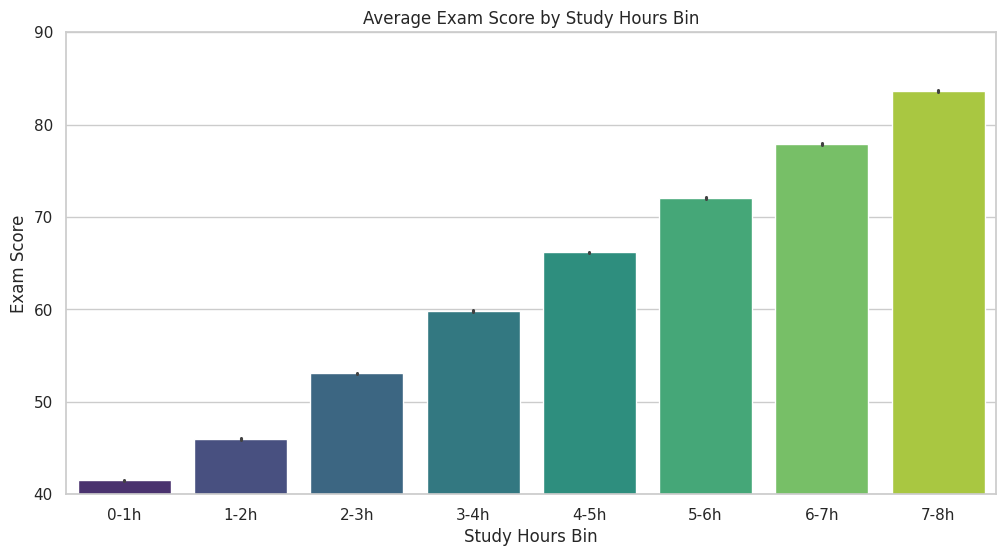

In [57]:
# 표시 옵션 설정
pd.set_option("display.max_columns", None)

# 룩업 테이블 정의
LUT = {
    "sleep_quality": {"good": 5, "average": 0, "poor": -5},
    "facility_rating": {"high": 4, "medium": 0, "low": -4},
    "study_method": {
        "coaching": 10,
        "mixed": 5,
        "group study": 2,
        "online videos": 1,
        "self-study": 0
    }
}

# 파생변수 생성 함수 정의
def create_derived_features(df):
    # 원본 보호 복사본 생성
    df = df.copy()

    # study_hours 구간화 설정
    bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    labels = ["0-1h", "1-2h", "2-3h", "3-4h", "4-5h", "5-6h", "6-7h", "7-8h"]

    # study_hours 구간화 변수 생성
    if "study_hours" in df.columns:
        df["study_bin"] = pd.cut(df["study_hours"], bins=bins, labels=labels)

    # 수면의 질 수치 매핑 정의
    quality_map = {"poor": 1, "average": 2, "good": 3}

    # 수면의 질 수치형 변수 생성
    if "sleep_quality" in df.columns:
        df["sleep_quality_num"] = df["sleep_quality"].map(quality_map)

    # 임계 분기 변수 생성
    if "study_hours" in df.columns:
        df["high_study"] = (df["study_hours"] >= 7).astype(int)

    # 상호작용 변수 생성
    if all(col in df.columns for col in ["study_hours", "class_attendance"]):
        df["study_att"] = df["study_hours"] * df["class_attendance"]
        df["attendance_per_hour"] = df["class_attendance"] / (df["study_hours"] + 1)

    # 제곱 변환 변수 생성
    if "study_hours" in df.columns:
        df["hours_squared"] = df["study_hours"] ** 2
        df["study_sqrt"] = np.sqrt(df["study_hours"])
        df["study_log"] = np.log1p(df["study_hours"])
        df["study_sq"] = df["study_hours"] ** 2

    if "class_attendance" in df.columns:
        df["attendance_squared"] = df["class_attendance"] ** 2

    if "sleep_hours" in df.columns:
        df["sleep_sq"] = df["sleep_hours"] ** 2

    # 수면 질 보정 공부 시간 생성
    if all(col in df.columns for col in ["study_hours", "sleep_quality_num"]):
        df["study_quality_adj"] = df["study_hours"] * (df["sleep_quality_num"] / 2)

    # 출석률과 수면 질 시너지 생성
    if all(col in df.columns for col in ["class_attendance", "sleep_quality_num"]):
        df["attendance_sleep_synergy"] = (df["class_attendance"] / 100) * df["sleep_quality_num"]

    # 프로파일링 변수 생성
    if all(col in df.columns for col in ["study_hours", "sleep_hours"]):
        df["balanced_type"] = (
            (df["study_hours"] >= 3) & (df["study_hours"] <= 6) &
            (df["sleep_hours"] >= 6) & (df["sleep_hours"] <= 8)
        ).astype(int)

    # 수동 공식 피처 생성
    need_cols = ["study_hours", "class_attendance", "sleep_hours", "sleep_quality", "study_method", "facility_rating"]
    if all(col in df.columns for col in need_cols):
        sleep_quality_score = df["sleep_quality"].map(LUT["sleep_quality"]).fillna(0)
        study_method_score = df["study_method"].map(LUT["study_method"]).fillna(0)
        facility_score = df["facility_rating"].map(LUT["facility_rating"]).fillna(0)

        df["manual_formula"] = (
            6.0 * df["study_hours"]
            + 0.35 * df["class_attendance"]
            + 1.5 * df["sleep_hours"]
            + sleep_quality_score
            + study_method_score
            + facility_score
        )

    # 모델 입력에서 의미가 거의 없던 피처 정리
    drop_cols = [
        "study_sqrt", "study_log", "study_sq",
        "hours_squared", "attendance_squared", "sleep_sq",
        "sleep_quality"
    ]
    df = df.drop(columns=[c for c in drop_cols if c in df.columns])

    return df


    return df

# 파생변수 탐색용 데이터 준비
df_feat = create_derived_features(train_raw)

# study_hours 구간별 시험 점수 요약
study_stats = df_feat.groupby("study_bin", observed=True)["exam_score"].agg(["mean", "std", "count"])
study_stats["mean_diff"] = study_stats["mean"].diff()

# 구간별 평균 점수 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_feat, x="study_bin", y="exam_score", palette="viridis")
plt.title("Average Exam Score by Study Hours Bin")
plt.xlabel("Study Hours Bin")
plt.ylabel("Exam Score")
plt.ylim(40, 90)
plt.show()

In [58]:
# 파생변수 상관 출력
corr_cols = [
    "study_hours",
    "class_attendance",
    "sleep_hours",
    "sleep_quality_num",
    "high_study",
    "study_att",
    "manual_formula",
    "study_quality_adj",
    "attendance_sleep_synergy",
    "study_sqrt",
    "study_log",
    "study_sq",
    "sleep_sq",
    "hours_squared",
    "attendance_squared",
    "attendance_per_hour",
    "balanced_type",
    "exam_score"
]

corr_cols = [c for c in corr_cols if c in df_feat.columns]

print("\nCorrelation with exam_score")
print(df_feat[corr_cols].corr()["exam_score"].sort_values(ascending=False))


Correlation with exam_score
exam_score                  1.000000
manual_formula              0.882268
study_att                   0.796722
study_hours                 0.762267
study_quality_adj           0.703034
high_study                  0.448263
attendance_sleep_synergy    0.376084
class_attendance            0.360954
sleep_quality_num           0.236895
sleep_hours                 0.167410
balanced_type               0.062026
attendance_per_hour        -0.493836
Name: exam_score, dtype: float64


In [62]:
# 모델링 블록

# 설정 고정
import os
import gc
import random
import numpy as np
import pandas as pd

import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import RidgeCV

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


# 시드 고정
SEED = 42
N_OUTER_FOLDS = 5
N_INNER_FOLDS = 3

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(SEED)


# 지표 계산
def rmse_np(pred, true):
    pred = np.asarray(pred, dtype=np.float64)
    true = np.asarray(true, dtype=np.float64)
    return float(np.sqrt(np.mean((pred - true) ** 2)))


# 데이터 준비
train = create_derived_features(train_raw)
test = create_derived_features(test_raw)
submission = submission_raw.copy()

target_col = "exam_score"
id_col = "id"

y = train[target_col].values
X_full = train.drop(columns=[target_col])
X_test_full = test.copy()


# 스태킹 피처 생성
cat_cols_stack = X_full.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols_stack = X_full.select_dtypes(exclude=["object", "category"]).columns.tolist()

preprocess_stack = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_stack),
        ("num", "passthrough", num_cols_stack),
    ],
    remainder="drop"
)

alphas = np.logspace(-3, 3, 13)
ridge = RidgeCV(alphas=alphas, cv=5)

stack_pipe = Pipeline(
    steps=[
        ("prep", preprocess_stack),
        ("ridge", ridge),
    ]
)

kf_stack = KFold(n_splits=5, shuffle=True, random_state=SEED)
oof_lr_pred = np.zeros(len(train), dtype=np.float64)
test_lr_pred_sum = np.zeros(len(test), dtype=np.float64)

for fold, (tr_idx, va_idx) in enumerate(kf_stack.split(X_full), 1):
    X_tr = X_full.iloc[tr_idx]
    y_tr = y[tr_idx]
    X_va = X_full.iloc[va_idx]

    stack_pipe.fit(X_tr, y_tr)
    oof_lr_pred[va_idx] = stack_pipe.predict(X_va)
    test_lr_pred_sum += stack_pipe.predict(X_test_full)

train["feature_lr_pred"] = oof_lr_pred
test["feature_lr_pred"] = test_lr_pred_sum / kf_stack.get_n_splits()


# Stage 1과 Stage 2에 공통 인코딩 적용
X_all = train.drop(columns=[target_col])
X_test_all = test.copy()

cat_cols = X_all.select_dtypes(include=["object", "category"]).columns.tolist()

ord_enc = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

if len(cat_cols) > 0:
    all_cat = pd.concat([X_all[cat_cols], X_test_all[cat_cols]], axis=0)
    ord_enc.fit(all_cat)

    X_all[cat_cols] = ord_enc.transform(X_all[cat_cols])
    X_test_all[cat_cols] = ord_enc.transform(X_test_all[cat_cols])


# Stage 2 MLP 정의
class ResidualMLP(nn.Module):
    def __init__(self, in_dim, hidden1=512, hidden2=256, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden2, 1),
        )

    def forward(self, x):
        return self.net(x)


class ResidualMLPRegressor:
    def __init__(
        self,
        seed,
        epochs=12,
        batch_size=2048,
        lr=3e-4,
        weight_decay=1e-4,
    ):
        self.seed = seed
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = lr
        self.weight_decay = weight_decay

        self.scaler = StandardScaler()
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model = None

    def fit(self, X_df, y_np):
        seed_everything(self.seed)

        X = self.scaler.fit_transform(X_df.values.astype(np.float32))
        y = y_np.astype(np.float32).reshape(-1, 1)

        X_t = torch.from_numpy(X)
        y_t = torch.from_numpy(y)

        ds = TensorDataset(X_t, y_t)
        dl = DataLoader(ds, batch_size=self.batch_size, shuffle=True, drop_last=False)

        self.model = ResidualMLP(X_t.shape[1]).to(self.device)
        opt = torch.optim.AdamW(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        loss_fn = nn.MSELoss()

        self.model.train()
        for _ in range(self.epochs):
            for xb, yb in dl:
                xb = xb.to(self.device)
                yb = yb.to(self.device)

                pred = self.model(xb)
                loss = loss_fn(pred, yb)

                opt.zero_grad()
                loss.backward()
                opt.step()

        return self

    def predict(self, X_df):
        X = self.scaler.transform(X_df.values.astype(np.float32))
        X_t = torch.from_numpy(X).to(self.device)

        self.model.eval()
        with torch.no_grad():
            pred = self.model(X_t).detach().cpu().numpy().reshape(-1)

        return pred


# Stage 1 모델 파라미터
TREE_PARAMS = dict(
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
)


# 레퍼런스 구조 그대로
outer_kf = KFold(n_splits=N_OUTER_FOLDS, shuffle=True, random_state=SEED)

oof_final = np.zeros(len(X_all), dtype=np.float64)
test_pred_sum = np.zeros(len(X_test_all), dtype=np.float64)

for fold, (tr_idx, va_idx) in enumerate(outer_kf.split(X_all), 1):
    X_tr = X_all.iloc[tr_idx].copy()
    y_tr = y[tr_idx].copy()

    X_va = X_all.iloc[va_idx].copy()
    y_va = y[va_idx].copy()

    X_te = X_test_all.copy()

    # Stage 1 Inner CV OOF 생성
    inner_kf = KFold(n_splits=N_INNER_FOLDS, shuffle=True, random_state=SEED + fold)

    oof_pred1_tr = np.zeros(len(tr_idx), dtype=np.float64)
    X_tr_reset = X_tr.reset_index(drop=True)
    y_tr_local = y_tr

    for inner_fold, (itr, iva) in enumerate(inner_kf.split(X_tr_reset), 1):
        X_itr = X_tr_reset.iloc[itr]
        y_itr = y_tr_local[itr]

        X_iva = X_tr_reset.iloc[iva]
        y_iva = y_tr_local[iva]

        m1 = lgb.LGBMRegressor(**TREE_PARAMS, random_state=SEED + inner_fold)
        m1.fit(
            X_itr,
            y_itr,
            eval_set=[(X_iva, y_iva)],
            eval_metric="rmse",
            callbacks=[lgb.early_stopping(50, verbose=False)]
        )

        oof_pred1_tr[iva] = m1.predict(X_iva, num_iteration=m1.best_iteration_)

    # Stage 1 Full fit
    m1_full = lgb.LGBMRegressor(**TREE_PARAMS, random_state=SEED + 1000 + fold)
    m1_full.fit(
        X_tr,
        y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="rmse",
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    pred1_va = m1_full.predict(X_va, num_iteration=m1_full.best_iteration_)
    pred1_te = m1_full.predict(X_te, num_iteration=m1_full.best_iteration_)

    # Stage 2 Residual 학습 데이터 구성
    res_tr = y_tr_local - oof_pred1_tr

    X_tr_stage2 = X_tr_reset.copy()
    X_tr_stage2["pred1"] = oof_pred1_tr

    X_va_stage2 = X_va.copy()
    X_va_stage2["pred1"] = pred1_va

    X_te_stage2 = X_te.copy()
    X_te_stage2["pred1"] = pred1_te

    # Stage 2 MLP Residual 학습과 예측
    mlp = ResidualMLPRegressor(
        seed=SEED + 2000 + fold,
        epochs=12,
        batch_size=2048
    )
    mlp.fit(X_tr_stage2, res_tr)

    pred2_va = mlp.predict(X_va_stage2)
    pred2_te = mlp.predict(X_te_stage2)

    # Stage 1과 Stage 2 합산
    final_va = pred1_va + pred2_va
    final_te = pred1_te + pred2_te

    oof_final[va_idx] = final_va
    test_pred_sum += final_te

    fold_rmse = rmse_np(final_va, y_va)
    print(f"Fold {fold} RMSE: {fold_rmse:.6f}")

    gc.collect()


# OOF 점수와 제출 생성
oof_rmse = rmse_np(oof_final, y)
print(f"OOF RMSE: {oof_rmse:.6f}")

test_pred = test_pred_sum / N_OUTER_FOLDS

submission[target_col] = test_pred
submission.to_csv("submission_tree_stage2_mlp_residual.csv", index=False)
print("Saved submission_tree_stage2_mlp_residual.csv")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2393
[LightGBM] [Info] Number of data points in the train set: 336000, number of used features: 21
[LightGBM] [Info] Start training from score 62.477551
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2393
[LightGBM] [Info] Number of data points in the train set: 336000, number of used features: 21
[LightGBM] [Info] Start training from score 62.482719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2393
[LightGBM] [Info] Number of data points in the train

KeyboardInterrupt: 